<a href="https://colab.research.google.com/github/PrabishaPradeep/Dsa/blob/main/virtual_competition2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# load the datasets into python environment

train_data = pd.read_csv('/content/train_ctrUa4K.csv')
test_data = pd.read_csv('/content/test_lAUu6dG.csv')
sampleSubmission_data = pd.read_csv('/content/sample_submission_49d68Cx.csv')

In [3]:
#display first five rows

train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#check basic details of train data

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Display summary statistics

train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# check null values in train data

train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

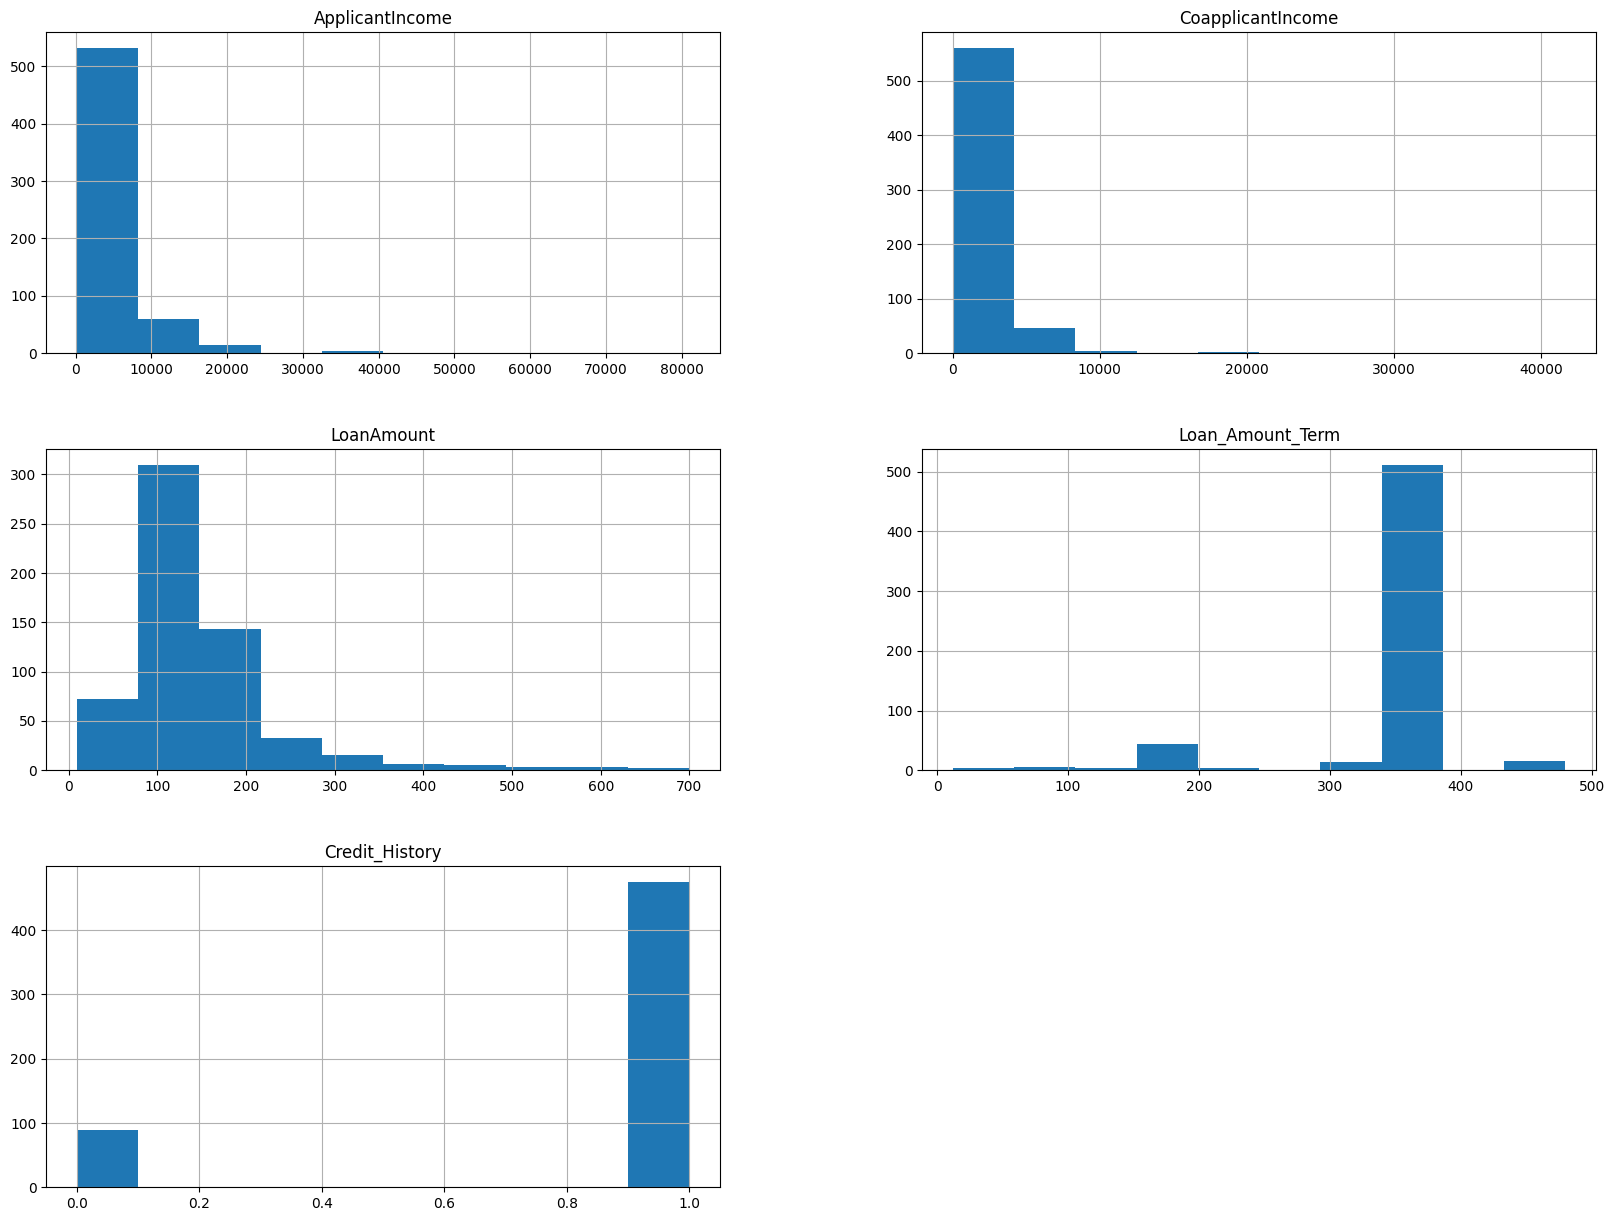

In [7]:
#plot the numerical columns of the dataset

num_columns = train_data.select_dtypes(include=['float64','int64'])
num_columns.hist(figsize=(20,15));

In [8]:
#Calculate the skewness

num_columns.skew()

#if the skewness value < -1 or > +1 -- Highly skewed distribution
#if the skewness value is between -1 & -1/2 or between +1/2 & +1 -- Moderately␣ skewed distribution
#if the skewness value between -1/2 & +1/2 -- Approximately symmetric distribution

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

the data shows Highly skewed distribution.

In [9]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
  train_data[i]=train_data[i].fillna(train_data[i].median())
for i in ['Gender','Married','Dependents','Self_Employed',]:
  train_data[i]=train_data[i].fillna(train_data[i].mode()[0])

In [10]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# Encode categorical variables

le = LabelEncoder()
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column] = le.fit_transform(train_data[column])


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 62.5 KB


<Axes: >

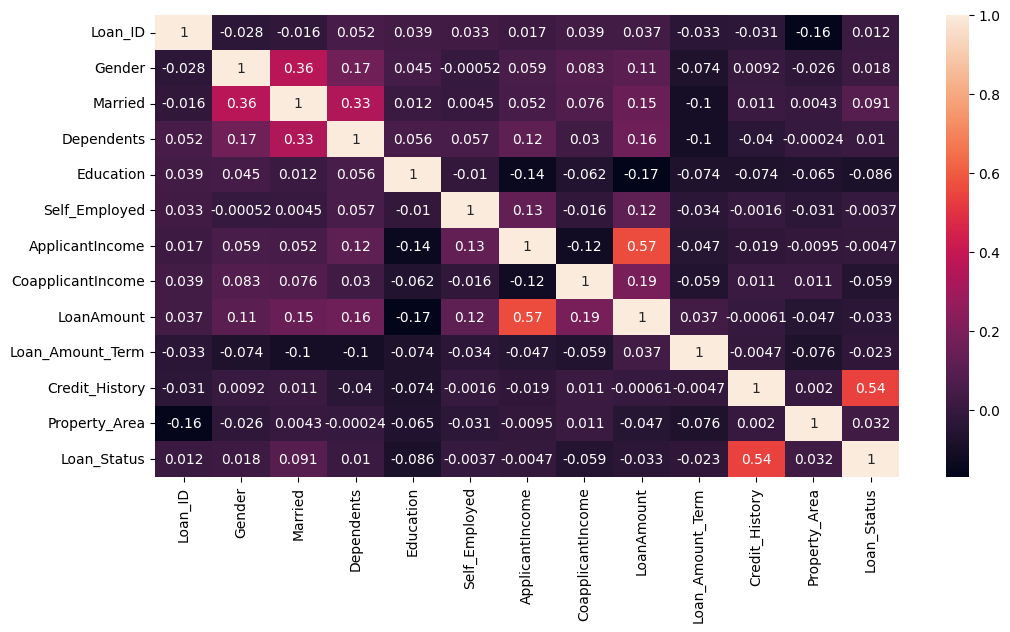

In [33]:
# plot heat map to check correlation

plt.figure(figsize = (12,6))
sns.heatmap(train_data.corr(), annot=True)

In [14]:
# Display summary statistics

test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [15]:
# now check basic details of test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [16]:
# check null values in test data

test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

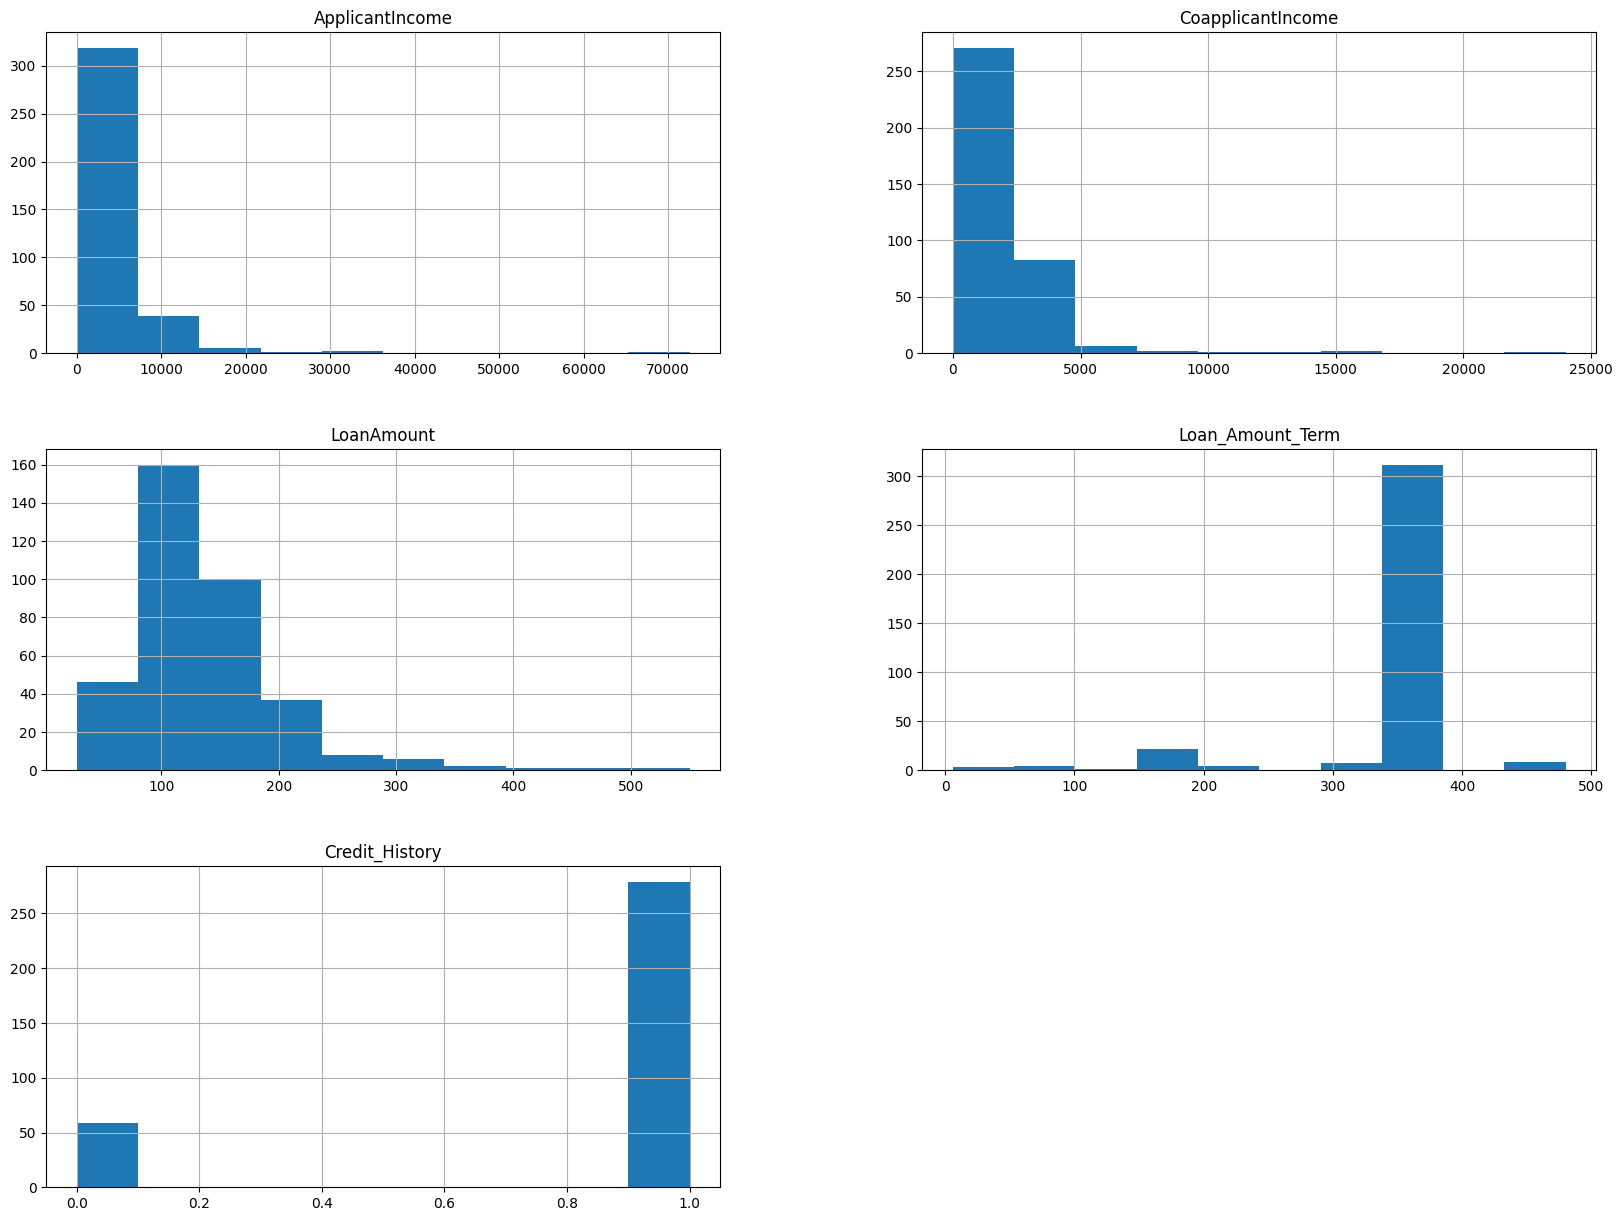

In [17]:
#plot the numerical columns of the dataset

num_columns = test_data.select_dtypes(include=['float64','int64'])
num_columns.hist(figsize=(20,15));

In [18]:
#Calculate the skewness

num_columns.skew()

#if the skewness value < -1 or > +1 -- Highly skewed distribution
#if the skewness value is between -1 & -1/2 or between +1/2 & +1 -- Moderately␣ skewed distribution
#if the skewness value between -1/2 & +1/2 -- Approximately symmetric distribution

ApplicantIncome      8.441375
CoapplicantIncome    4.257357
LoanAmount           2.223512
Loan_Amount_Term    -2.679318
Credit_History      -1.722379
dtype: float64

the data shows Highly skewed distribution.

In [19]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
  test_data[i]=test_data[i].fillna(test_data[i].median())
for i in ['Gender','Dependents','Self_Employed',]:
  test_data[i]=test_data[i].fillna(test_data[i].mode()[0])

In [20]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [21]:
# Encode categorical variables

le = LabelEncoder()
for column in test_data.columns:
    if test_data[column].dtype == 'object':
        test_data[column] = le.fit_transform(test_data[column])

In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    int64  
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 34.5 KB


In [23]:
# Split the train dataset into features (X_train) and target (y_train)

X_train = train_data.drop('Loan_Status', axis=1)
y_train = train_data['Loan_Status']

In [24]:
# Define the model

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

In [25]:
# Train the model

X_train = train_data.drop('Loan_Status', axis=1)
y_train = train_data['Loan_Status']
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [26]:
# Predict on test set
test_predictions = model.predict(test_data)

# Print the predictions with labels
for i in range(len(test_predictions)):
    print(f"Loan_ID: {test_data['Loan_ID'].iloc[i]}, Prediction: {'Approved' if test_predictions[i]=='Y' else 'Not Approved'}")


Loan_ID: 0, Prediction: Not Approved
Loan_ID: 1, Prediction: Not Approved
Loan_ID: 2, Prediction: Not Approved
Loan_ID: 3, Prediction: Not Approved
Loan_ID: 4, Prediction: Not Approved
Loan_ID: 5, Prediction: Not Approved
Loan_ID: 6, Prediction: Not Approved
Loan_ID: 7, Prediction: Not Approved
Loan_ID: 8, Prediction: Not Approved
Loan_ID: 9, Prediction: Not Approved
Loan_ID: 10, Prediction: Not Approved
Loan_ID: 11, Prediction: Not Approved
Loan_ID: 12, Prediction: Not Approved
Loan_ID: 13, Prediction: Not Approved
Loan_ID: 14, Prediction: Not Approved
Loan_ID: 15, Prediction: Not Approved
Loan_ID: 16, Prediction: Not Approved
Loan_ID: 17, Prediction: Not Approved
Loan_ID: 18, Prediction: Not Approved
Loan_ID: 19, Prediction: Not Approved
Loan_ID: 20, Prediction: Not Approved
Loan_ID: 21, Prediction: Not Approved
Loan_ID: 22, Prediction: Not Approved
Loan_ID: 23, Prediction: Not Approved
Loan_ID: 24, Prediction: Not Approved
Loan_ID: 25, Prediction: Not Approved
Loan_ID: 26, Predictio

In [27]:
# Prepare submission data

submission = pd.read_csv('/content/sample_submission_49d68Cx.csv')
submission['Loan_Status'] = le.inverse_transform(test_predictions)  # Convert numerical values back to original labels


In [28]:
# Save submission file

submission.to_csv('submission.csv', index=False)